In [1]:
#Ë∑ØÂæÑÁÆ°ÁêÜ/ÂÖ®Â±ÄÂèòÈáè
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns       # sns ÊòØ seaborn ÁöÑÂ∏∏Áî®Âà´Âêç
import matplotlib.pyplot as plt  # plt ÊòØ matplotlib.pyplot ÁöÑÂ∏∏Áî®Âà´Âêç

# ËÆæÁΩÆ‰∏∫È°πÁõÆÊ†πÁõÆÂΩïÔºàÂåÖÂê´ data, pipline Á≠âÊñá‰ª∂Â§πÁöÑÁõÆÂΩïÔºâ
project_root = os.path.abspath("..")
os.chdir(project_root)
sys.path.append(project_root)
from utils.path_helper import get_data_path

#Âü∫Á°ÄÊ®°Âùó
from PreAnalysis.Preprocess import preprocess
from pipeline.pipeline import processing_data
from features_project.features import add_selected_features
from features_project.features_meatures import FeatureAnalysis
from features_project.features_meatures import feature_selection_by_k
from features_project.features_meatures import select_final_top_features
from features_project.features_meatures import check_multicollinearity

#Ê®°ÂûãÂØºÂÖ•
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

##Ë∞ÉÂèÇ
from Params_Modify.grid import grid_search_models_f1
from Params_Modify.config_model_params import model_params
from utils.config import best_model_configs
##ËÆ≠ÁªÉ
from train_model.train import train_model_classify

##ËØÑ‰º∞
from evaluate_model.evaluate import evaluate

(4999, 10)
CustomerID: Áº∫Â§±ÂÄºÊï∞Èáè = 0
Age: Áº∫Â§±ÂÄºÊï∞Èáè = 254
Gender: Áº∫Â§±ÂÄºÊï∞Èáè = 0
Tenure_Months: Áº∫Â§±ÂÄºÊï∞Èáè = 257
Contract_Type: Áº∫Â§±ÂÄºÊï∞Èáè = 235
Monthly_Charges: Áº∫Â§±ÂÄºÊï∞Èáè = 270
Data_Usage_GB: Áº∫Â§±ÂÄºÊï∞Èáè = 257
Payment_Method: Áº∫Â§±ÂÄºÊï∞Èáè = 224
Customer_Service_Calls: Áº∫Â§±ÂÄºÊï∞Èáè = 259
Churn: Áº∫Â§±ÂÄºÊï∞Èáè = 0
(3973, 10)
(3973, 10)
CustomerID: Áº∫Â§±ÂÄºÊï∞Èáè = 0
Age: Áº∫Â§±ÂÄºÊï∞Èáè = 0
Gender: Áº∫Â§±ÂÄºÊï∞Èáè = 0
Tenure_Months: Áº∫Â§±ÂÄºÊï∞Èáè = 0
Contract_Type: Áº∫Â§±ÂÄºÊï∞Èáè = 0
Monthly_Charges: Áº∫Â§±ÂÄºÊï∞Èáè = 0
Data_Usage_GB: Áº∫Â§±ÂÄºÊï∞Èáè = 0
Payment_Method: Áº∫Â§±ÂÄºÊï∞Èáè = 0
Customer_Service_Calls: Áº∫Â§±ÂÄºÊï∞Èáè = 0
Churn: Áº∫Â§±ÂÄºÊï∞Èáè = 0
(3973, 10)
Â§ÑÁêÜÂâç hot_gender ÁöÑ df.columns: ['CustomerID', 'Age', 'Gender', 'Tenure_Months', 'Contract_Type', 'Monthly_Charges', 'Data_Usage_GB', 'Payment_Method', 'Customer_Service_Calls', 'Churn', 'normal_age', 'Data_Usage_log', 'Monthly_Charges_log']
ÂèØÁî®ÁâπÂæÅÂáΩÊï∞Ôºö ['age

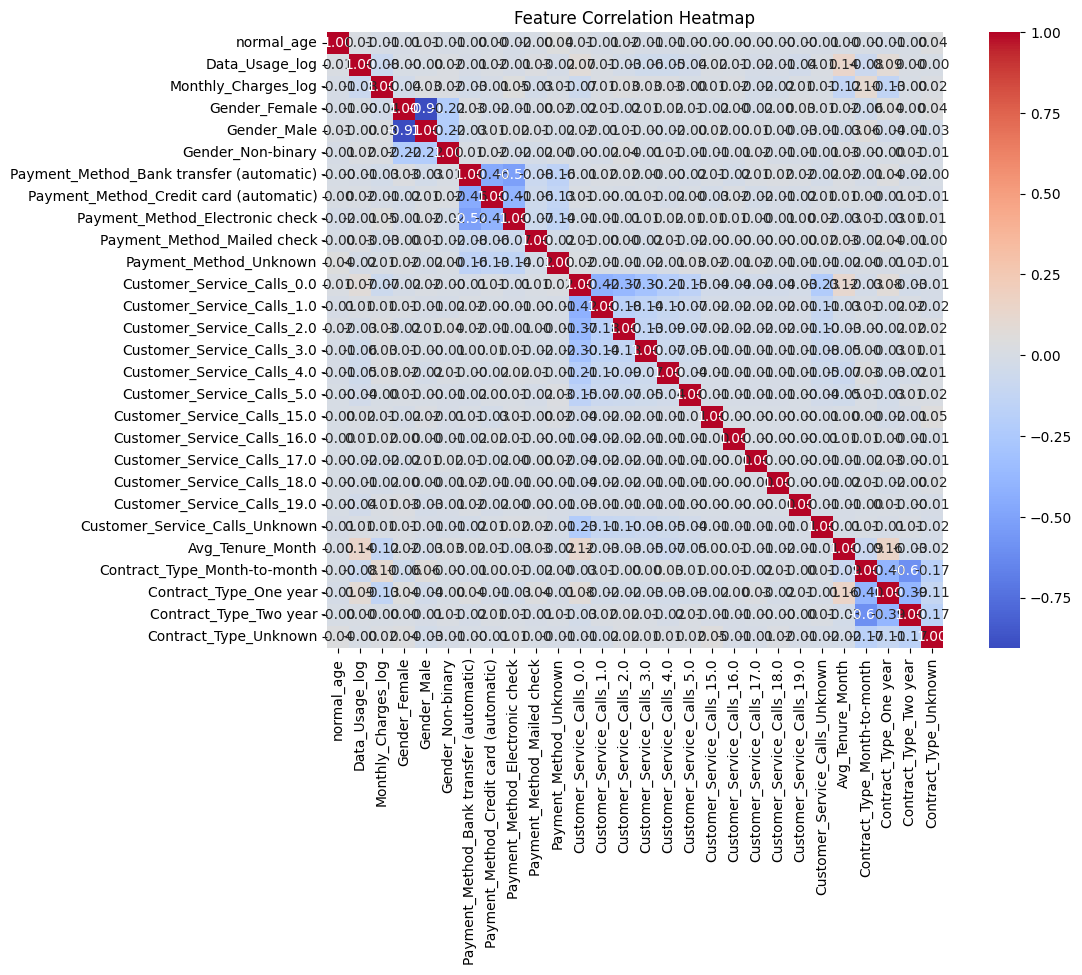

 È´òÂ∫¶Áõ∏ÂÖ≥ÁöÑÁâπÂæÅÂØπÔºà|Áõ∏ÂÖ≥ÊÄß| > 0.85)Ôºö
Gender_Male & Gender_Female ‚Üí Áõ∏ÂÖ≥Á≥ªÊï∞: -0.906
üîç Ê£ÄÊµãÂà∞ 0 ‰∏™È´òÁõ∏ÂÖ≥ÁâπÂæÅÂ∞ÜË¢´Âà†Èô§ÔºàÈòàÂÄºÔºö0.85ÔºâÔºö
[]
normal_age
Data_Usage_log
Monthly_Charges_log
Gender_Female
Gender_Male
Gender_Non-binary
Payment_Method_Bank transfer (automatic)
Payment_Method_Credit card (automatic)
Payment_Method_Electronic check
Payment_Method_Mailed check
Payment_Method_Unknown
Customer_Service_Calls_0.0
Customer_Service_Calls_1.0
Customer_Service_Calls_2.0
Customer_Service_Calls_3.0
Customer_Service_Calls_4.0
Customer_Service_Calls_5.0
Customer_Service_Calls_15.0
Customer_Service_Calls_16.0
Customer_Service_Calls_17.0
Customer_Service_Calls_18.0
Customer_Service_Calls_19.0
Customer_Service_Calls_Unknown
Avg_Tenure_Month
Contract_Type_Month-to-month
Contract_Type_One year
Contract_Type_Two year
Contract_Type_Unknown
‰º†ÂÖ•ÁöÑÁâπÂæÅÊï∞: 28
ÂéüÂßã df.shape: (3973, 28)
ÊúÄÁªàËøõÂÖ•VIFËÆ°ÁÆóÁöÑÂàóÊï∞: 28
ËøõÂÖ•VIFËÆ°ÁÆóÁöÑÁâπÂæÅÂàó: ['normal

d:\soft\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\soft\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


üß™ ÊñπÂ∑ÆËÜ®ËÉÄÂõ†Â≠ê(VIF)Ê£ÄÊµãÁªìÊûú:
                                     feature  VIF
4                              Gender_Female  inf
5                                Gender_Male  inf
6                          Gender_Non-binary  inf
7   Payment_Method_Bank transfer (automatic)  inf
8     Payment_Method_Credit card (automatic)  inf
9            Payment_Method_Electronic check  inf
10               Payment_Method_Mailed check  inf
11                    Payment_Method_Unknown  inf
12                Customer_Service_Calls_0.0  inf
13                Customer_Service_Calls_1.0  inf
14                Customer_Service_Calls_2.0  inf
15                Customer_Service_Calls_3.0  inf
16                Customer_Service_Calls_4.0  inf
17                Customer_Service_Calls_5.0  inf
18               Customer_Service_Calls_15.0  inf
19               Customer_Service_Calls_16.0  inf
20               Customer_Service_Calls_17.0  inf
21               Customer_Service_Calls_18.0  inf
22      

d:\soft\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\soft\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


‚ö†Ô∏è  Âà†Èô§È´òVIFÁâπÂæÅ: Gender_Female (VIF=inf)


d:\soft\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\soft\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


‚ö†Ô∏è  Âà†Èô§È´òVIFÁâπÂæÅ: Payment_Method_Bank transfer (automatic) (VIF=inf)


d:\soft\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\soft\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


‚ö†Ô∏è  Âà†Èô§È´òVIFÁâπÂæÅ: Customer_Service_Calls_0.0 (VIF=inf)
‚ö†Ô∏è  Âà†Èô§È´òVIFÁâπÂæÅ: Contract_Type_Month-to-month (VIF=inf)


d:\soft\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\soft\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


ÂéªÊéâÁº∫Â§±ÂÄºÂêéÁöÑÂΩ¢Áä∂: (3973, 24)
24
    num_features                                       top_features
0             10  [Data_Usage_log, Monthly_Charges_log, Gender_M...
1             11  [Data_Usage_log, Monthly_Charges_log, Gender_M...
2             12  [Data_Usage_log, Monthly_Charges_log, Gender_M...
3             13  [Data_Usage_log, Monthly_Charges_log, Gender_M...
4             14  [Data_Usage_log, Monthly_Charges_log, Gender_M...
5             15  [Data_Usage_log, Monthly_Charges_log, Gender_M...
6             16  [Data_Usage_log, Monthly_Charges_log, Gender_M...
7             17  [Avg_Tenure_Month, Data_Usage_log, Monthly_Cha...
8             18  [Avg_Tenure_Month, Data_Usage_log, Contract_Ty...
9             19  [Avg_Tenure_Month, Data_Usage_log, Contract_Ty...
10            20  [Avg_Tenure_Month, Data_Usage_log, Gender_Male...
Avg_Tenure_Month
Data_Usage_log
Gender_Male
Contract_Type_Two year
Contract_Type_One year
Monthly_Charges_log
Payment_Method_Credit card (aut

In [2]:
#ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv(get_data_path("TrainingSet.csv"))
print(df.shape)
##ÂÆû‰æãÂåñÂêéÊñπ‰æøÂàùÊ≠•ÂàÜÊûê
process_data = preprocess(df)
#Â°´ÂÖÖÂâçÁúãÂõæ raw pictures
#process_data. picture_analysis()  ##if you want to analyse through the pictures, canceling "##"
##Êü•È™åÂπ∂Â°´ÂÖÖ
process_data.missingdata_count()
df_withoutfalse = process_data.detect_extreme()
print(df_withoutfalse.shape)
#ÂÆåÊàêÂ°´ÂÖÖÁº∫Â§±ÂÄº
df_withoutfalse = processing_data(df_withoutfalse)
df_withoutfalse.processing_number_data()
df_cleaned = df_withoutfalse.processing_amount_data()
print(df_cleaned.shape)
#Â°´ÂÖÖÂêéÁúãÂõæ new pictures   ##if you want to analyse through the pictures, canceling "##"
process_data_after = preprocess(df_cleaned)
#process_data_after.picture_analysis()  ##if you want to analyse through the pictures, canceling "##"
process_data_after.missingdata_count()
print(df_cleaned.shape)


#ÂΩïÂÖ•ÁâπÂæÅÂÄº
My_features = ["normal_age", "Data_Usage_log", "Monthly_Charges_log", "hot_gender","Payment_Method_hot", "Customer_Service_Calls_hot","Avg_Tenure_Month", "Contract_Type"]
#Âä†ÂÖ•ÁâπÂæÅÂÄº
df_cleaned_features,added_features = add_selected_features(df_cleaned, features_to_use=My_features)
for col in df_cleaned_features.columns:
    print(col)
print(df_cleaned_features[added_features].dtypes)
#ËΩ¨bool‰∏∫Êï∞ÂÄº
df_cleaned_features[added_features] = df_cleaned_features[added_features].astype("int")
df_cleaned_features_1 = df_cleaned_features.copy()



#Áõ∏ÂÖ≥ÊÄßÂàÜÊûê
df_cleaned_features = FeatureAnalysis(df_cleaned_features, features=added_features, model_cls=RandomForestClassifier, target_col="Churn")
#df_cleaned_features.plot_feature_importance()  ##if you want to analyse through the pictures, canceling "##"
#df_cleaned_features.plot_feature_distribution()  ##if you want to analyse through the pictures, canceling "##"
#df_cleaned_features.plot_feature_vs_target()    ##if you want to analyse through the pictures, canceling "##"
advanced_feature = df_cleaned_features.plot_feature_correlation(add_features=added_features)
###########
df_cleaned_features_1[advanced_feature] = df_cleaned_features_1[advanced_feature].astype("int")
###########



##VIFÂàÜÊûê
for feature in advanced_feature:
    print(feature)
advanced_features_ultimate = check_multicollinearity(df_cleaned_features_1, features = advanced_feature, threshold=10, verbose= True)
print(len(advanced_features_ultimate))



##ÂàÜÊûêÊØè‰∏™ÁâπÂæÅÊï∞‰∏ãÁöÑÊúÄ‰ºòÁªÑÂêà
df_result = feature_selection_by_k(df_cleaned_features_1[advanced_features_ultimate], target_col = df_cleaned_features_1["Churn"], max_k=20, rank_features=10, model_cls = RandomForestClassifier)
print(df_result)



##Áõ¥Êé•ÈÄâÂá∫ÊúÄÁªàÊúÄÈáçË¶ÅÁöÑ10‰∏™ÁâπÂæÅ
final_features = select_final_top_features(df_cleaned_features_1[advanced_features_ultimate], target_col = df_cleaned_features_1["Churn"], max_k=20, top_k=15, model_cls = RandomForestClassifier)
for feature in final_features:
    print(feature)

##Ê£ÄÊü•‰∏Ä‰∏ãÁ≠õÈÄâÊµÅÁ®ã    
print(len(My_features)) #8
print(len(added_features))#26
print(len(advanced_feature)) #26
print(len(advanced_features_ultimate))#4
print(len(final_features))#4


In [3]:
##Â§ÑÁêÜÊµãËØïÈõÜ


#ËØªÂèñÊï∞ÊçÆ
#df_test = pd.read_csv(get_data_path("TestSet.csv"))
#print(df_test.shape)
#print(df_test[df_test.isna().any(axis=1)].shape)
#df_test[df_test.isna().any(axis=1)]

#processor = processing_data(df_test)
#Â°´ÂÖÖÊµãËØïÈõÜ
#df_test = processor.processing_number_data()
#df_test = processor.processing_amount_data()
#df_test = processor.processing_Median_fill()

#Âä†ÂÖ•ÁâπÂæÅÂÄº
#df_test_features,added_features_backup = add_selected_features(df_test, features_to_use=My_features)
#ËΩ¨bool‰∏∫Êï∞ÂÄº
#X_test = df_test_features[final_features]
#y_test = df_test_features["Churn"]

#print(df_test.shape)
#print(df_test[df_test.isna().any(axis=1)].shape)
#df_test[df_test.isna().any(axis=1)]

In [4]:
##ÁΩëÊ†ºÂåñË∞ÉÂèÇ
X = df_cleaned_features_1[final_features]
y = df_cleaned_features_1["Churn"]
grid_results = grid_search_models_f1(X, y, model_params)
print(grid_results)
##ËÆ∞ÂÖ•config

‚úÖ Logistic ÂÆåÊàêÔºöF1 = 0.7226
ÊúÄ‰Ω≥ÂèÇÊï∞Ôºö {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
----------------------------------------
‚úÖ RandomForest ÂÆåÊàêÔºöF1 = 0.7307
ÊúÄ‰Ω≥ÂèÇÊï∞Ôºö {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
----------------------------------------


d:\soft\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:02:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


‚úÖ XGBoost ÂÆåÊàêÔºöF1 = 0.7292
ÊúÄ‰Ω≥ÂèÇÊï∞Ôºö {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
----------------------------------------
‚úÖ GBDT ÂÆåÊàêÔºöF1 = 0.7298
ÊúÄ‰Ω≥ÂèÇÊï∞Ôºö {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
----------------------------------------
‚úÖ SVM ÂÆåÊàêÔºöF1 = 0.6971
ÊúÄ‰Ω≥ÂèÇÊï∞Ôºö {'C': 0.1, 'kernel': 'linear'}
----------------------------------------
          Model  Best F1 Score  \
1  RandomForest       0.730663   
3          GBDT       0.729831   
2       XGBoost       0.729237   
0      Logistic       0.722637   
4           SVM       0.697086   

                                         Best Params  
1  {'max_depth': None, 'min_samples_split': 5, 'n...  
3  {'learning_rate': 0.05, 'max_depth': 5, 'n_est...  
2  {'learning_rate': 0.1, 'max_depth': 6, 'n_esti...  
0      {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}  
4                     {'C': 0.1, 'kernel': 'linear'}  


In [5]:
#ËÆ≠ÁªÉÊ®°Âûã
after_trained_model,X_train, X_test, y_train, y_test = train_model_classify(df_cleaned_features = df_cleaned_features_1, model_config = best_model_configs["RandomForest"], final_features = final_features)
#ËØÑ‰º∞Ê®°Âûã
ev = evaluate(model = after_trained_model, X_test = X_test, y_test = y_test)
#ev.evaluate_classify_model(average="binary") 


‚úÖ Ê®°ÂûãËÆ≠ÁªÉÂÆåÊàêÔºå‰øùÂ≠òÂà∞Ôºö models_saved/rf_model.pkl


In [6]:
ev.evaluate_classify_model(average="weighted") 



‚úÖ Accuracy : 0.6642
‚úÖ F1 Score : 0.6857
‚úÖ Precision: 0.7225
‚úÖ Recall   : 0.6642
‚úÖ AUC      : 0.6410


{'Accuracy': 0.6641509433962264,
 'F1': 0.6856835040451538,
 'Precision': 0.7224635101459594,
 'Recall': 0.6641509433962264,
 'AUC': 0.64103133618376}